# Import Required Packages

In [1]:
import pandas as pd
import numpy as np
import os
import random
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
dirs = ('tree', )

for dir in dirs:
    try:
        os.mkdir(dir)
    except:
        pass

# Load Data, check if things are valid, and get some basic information of the dataframe

In [3]:
data = pd.read_csv('./column_3C.csv',header=1)
data.columns = ['Pelvic Incidence', 'Pelvic Tilt', 'Lumbar Lordosis Angle', 'Sacral Slope', 'Pelvic Radius', 'Grade of Spondylolisthesis', 'Class']
data.head()

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis,Class
0,39.06,10.06,25.02,29.00,114.41,4.56,DH
1,68.83,22.22,50.09,46.61,105.99,-3.53,DH
2,69.30,24.65,44.31,44.64,101.87,11.21,DH
3,49.71,9.65,28.32,40.06,108.17,7.92,DH
4,40.25,13.92,25.12,26.33,130.33,2.23,DH


In [4]:
data.tail()

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis,Class
304,47.90,13.62,36.00,34.29,117.45,-4.25,NO
305,53.94,20.72,29.22,33.22,114.37,-0.42,NO
306,61.45,22.69,46.17,38.75,125.67,-2.71,NO
307,45.25,8.69,41.58,36.56,118.55,0.21,NO
308,33.84,5.07,36.64,28.77,123.95,-0.20,NO


We can understand that there are 308 rows of records, where the class is in order of "DH", "SL", and "NO"

---

In [5]:
# Split the data into X (the parameters) and Y (the class result)
array = data.to_numpy()
x, y = np.split(array, [-1], 1)

training_labels = data.iloc[:, -1]
le   = preprocessing.LabelEncoder()
y = le.fit_transform(training_labels)

print('First, we look at the parameters: ')
print(x[:5])
print("\nFirst five label are 'DH', which is labeled as: ")
print(y[:5])
print("\nLast five label are 'NO', which is labeled as:")
print(y[-5:])
print("\nTherefore, 0 is DH, 1 is NO, and 2 is SL")

First, we look at the parameters: 
[[39.06 10.06 25.02 29.0 114.41 4.56]
 [68.83 22.22 50.09 46.61 105.99 -3.53]
 [69.3 24.65 44.31 44.64 101.87 11.21]
 [49.71 9.65 28.32 40.06 108.17 7.92]
 [40.25 13.92 25.12 26.33 130.33 2.23]]

First five label are 'DH', which is labeled as: 
[0 0 0 0 0]

Last five label are 'NO', which is labeled as:
[1 1 1 1 1]

Therefore, 0 is DH, 1 is NO, and 2 is SL


In [6]:
labels = ['DH', 'NO', 'SL']

In [7]:
# Split into train set and test set of X and Y, we use the test_size = 33% of the total number of records
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(207, 6) (102, 6) (207,) (102,)


---

# Random Forest Model

In [8]:
scores = []
max_score = 0
max_score_size = 0
max_classifier = None

for i in range(1, 51):
    clf = RandomForestClassifier(n_estimators=i)
    clf = clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    if score > max_score:
        max_score = score
        max_score_size = i
        max_classifier = clf

#Show the best performer
print('Best Score Model has %d component trees: %.2f' % (max_score_size, max_score))

Best Score Model has 30 component trees: 0.85


<module 'matplotlib.pyplot' from 'C:\\Users\\MSSMu\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

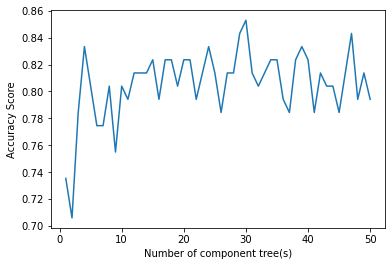

In [9]:
# Visualization of the scores as the number of trees increases
plt.plot(range(1, 51), scores)
plt.xlabel('Number of component tree(s)')
plt.ylabel('Accuracy Score')
plt.savefig('random-forest-size-comparison.jpg')
plt

In [10]:
rnd_list = random.sample(range(max_score_size), 3)
rnd_list

[19, 11, 10]

In [11]:
#We randomly choose 3 component decision trees, show the accuracy score and record the ferature importance scores
features = []

for i in rnd_list:
    # Visualize the tree
    dot_data = tree.export_graphviz(max_classifier.estimators_[i], feature_names=data.columns[: -1], 
                                    class_names=labels, filled=True,out_file=None, rounded=True, 
                                    special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render('./tree/Q2-size-%d-seed-%d'%(max_score_size, i), format = 'jpg')

    # Obtain the tree's performance
    y_pred = max_classifier.estimators_[i].predict(x_test)
    print('Random Seed: %d - %.5f' % (i, accuracy_score(y_test, y_pred)))
    features.append(max_classifier.feature_importances_)
print('Original Model - %.5f' % (max_score))

pd.DataFrame(features, columns=data.columns[:-1])

Random Seed: 19 - 0.72549
[0.06842721 0.01898091 0.08239964 0.28226091 0.19419008 0.35374125]
Random Seed: 11 - 0.72549
[0.32785154 0.1778073  0.02346613 0.03554592 0.1022498  0.33307931]
Random Seed: 10 - 0.74510
[0.01730248 0.12599354 0.33195362 0.08140858 0.24961807 0.1937237 ]
Original Model - 0.85294


,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Grade of Spondylolisthesis
0,0.158632,0.091871,0.104064,0.127142,0.143981,0.37431
